In [1]:
import uproot as up
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


/hpc/applications/anaconda/3/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
branch_names = ['AntiKt4EMTopoJets_partonTruthLabel', 'AntiKt4EMTopoJets_flavorExtendedLabel',
                'AntiKt4EMTopoJets_flavorLabel','AntiKt4EMTopoJets_nConstituents',
                'AntiKt4EMTopoJets_clus_0_lambda','AntiKt4EMTopoJets_clus_0_mag',
                'AntiKt4EMTopoJets_clus_0_em_prob','AntiKt4EMTopoJets_clus_0_second_r',
                'AntiKt4EMTopoJets_clus_0_first_eng_dens','AntiKt4EMTopoJets_clus_0_pos_eng',
                'AntiKt4EMTopoJets_clus_0_calE','AntiKt4EMTopoJets_clus_0_clus_calPhi',
                'AntiKt4EMTopoJets_clus_0_clus_calEta','AntiKt4EMTopoJets_clus_0_second_lambda',
                'AntiKt4EMTopoJets_clus_1_lambda','AntiKt4EMTopoJets_clus_1_mag',
                'AntiKt4EMTopoJets_clus_1_em_prob','AntiKt4EMTopoJets_clus_1_second_r',
                'AntiKt4EMTopoJets_clus_1_first_eng_dens','AntiKt4EMTopoJets_clus_1_pos_eng',
                'AntiKt4EMTopoJets_clus_1_calE','AntiKt4EMTopoJets_clus_1_clus_calPhi',
                'AntiKt4EMTopoJets_clus_1_clus_calEta','AntiKt4EMTopoJets_clus_1_second_lambda',
                'AntiKt4EMTopoJets_clus_2_lambda','AntiKt4EMTopoJets_clus_2_mag',
                'AntiKt4EMTopoJets_clus_2_em_prob','AntiKt4EMTopoJets_clus_2_second_r',
                'AntiKt4EMTopoJets_clus_2_first_eng_dens','AntiKt4EMTopoJets_clus_2_pos_eng',
                'AntiKt4EMTopoJets_clus_2_calE','AntiKt4EMTopoJets_clus_2_clus_calPhi',
                'AntiKt4EMTopoJets_clus_2_clus_calEta','AntiKt4EMTopoJets_clus_2_second_lambda',]
#branches = events.arrays(['*jet*',"topoClus*"],namedecode='utf-8')
#branches.keys()


In [3]:
events = up.open("/scratch/users/rnarayan/Gep_samples/ttbar_nonAllhad_v2.root")['ntuple']
df_events = events.pandas.df(branch_names,flatten=True )
#events.keys()
df_events['AntiKt4EMTopoJets_flavorLabel']

entry  subentry
0      0           5
       1           4
       2           0
       3           0
       4           0
                  ..
99879  34          0
       35          0
       36          0
       37          0
       38          0
Name: AntiKt4EMTopoJets_flavorLabel, Length: 4033512, dtype: int32

In [4]:
#df_events['mod_mu_pt'] = df_events.apply(lambda x: x['lvl1mu_pt'][0] if len(x['lvl1mu_pt'])>0 else -1, axis=1)
#df_events['mod_mu_eta']= df_events.apply(lambda x: x['lvl1mu_eta'][0] if len(x['lvl1mu_eta'])>0 else -1,axis=1)
#df_events['mod_mu_phi']= df_events.apply(lambda x: x['lvl1mu_phi'][0] if len(x['lvl1mu_phi'])>0 else -1,axis=1)

#df_events['mod_mu_pt'] = df_events.apply(lambda x: x['mu_pt'][0] if len(x['mu_pt'])>0 else -1, axis=1)
#df_events['mod_mu_eta']= df_events.apply(lambda x: x['mu_eta'][0] if len(x['mu_eta'])>0 else -1,axis=1)
#df_events['mod_mu_phi']= df_events.apply(lambda x: x['mu_phi'][0] if len(x['mu_phi'])>0 else -1,axis=1)

#df_events['mod_mu_pt'] = df_events.apply(lambda x: x['mu_pt'][x['mu_pt'].argmax()] if len(x['mu_pt'])>0 else -1, axis=1)
#df_events['mod_mu_eta'] = df_events.apply(lambda x: x['mu_eta'][x['mu_pt'].argmax()] if len(x['mu_pt'])>0 else -1, axis=1)
#df_events['mod_mu_phi'] = df_events.apply(lambda x: x['mu_phi'][x['mu_pt'].argmax()] if len(x['mu_pt'])>0 else -1, axis=1)


In [5]:
df_bJets = df_events.loc[df_events['AntiKt4EMTopoJets_flavorExtendedLabel']==5].copy(deep=True)
df_taus  = df_events.loc[df_events['AntiKt4EMTopoJets_flavorExtendedLabel']==15].copy(deep=True)
df_lightjets = df_events.loc[(df_events['AntiKt4EMTopoJets_flavorExtendedLabel']!=5)
                            & (df_events['AntiKt4EMTopoJets_flavorExtendedLabel']!=4)
                            & (df_events['AntiKt4EMTopoJets_flavorExtendedLabel']!=55)
                            & (df_events['AntiKt4EMTopoJets_flavorExtendedLabel']!=45)
                            & (df_events['AntiKt4EMTopoJets_flavorExtendedLabel']!=15)].copy(deep=True)
df_lightjets = df_lightjets[(df_lightjets['AntiKt4EMTopoJets_partonTruthLabel']==1 )|
                           (df_lightjets['AntiKt4EMTopoJets_partonTruthLabel']==2 )|
                           (df_lightjets['AntiKt4EMTopoJets_partonTruthLabel']==3)].copy(deep=True)#

##df_bJets = df_events.loc[df_events['AntiKt4EMTopoJets_partonTruthLabel']==5].copy(deep=True)
##df_lightjets = df_events.loc[ (df_events['AntiKt4EMTopoJets_partonTruthLabel']==1) |
##                              (df_events['AntiKt4EMTopoJets_partonTruthLabel']==2) |
 ##                             (df_events['AntiKt4EMTopoJets_partonTruthLabel']==3)]# |
 ##                             #(df_events['AntiKt4EMTopoJets_partonTruthLabel']==21)]
##df_tauJets = df_events.loc[df_events['AntiKt4EMTopoJets_flavorExtendedLabel']==15].copy(deep=True)
df_gluJets = df_events.loc[df_events['AntiKt4EMTopoJets_partonTruthLabel']==21].copy(deep=True)


#Now draw 100,000 of each randomly
#df_bJets = df_bJets.sample(100000)
#df_lightjets = df_lightjets.sample(100000)
variables_for_train = branch_names[:]
[variables_for_train.remove(x) for x in 
 ['AntiKt4EMTopoJets_partonTruthLabel','AntiKt4EMTopoJets_flavorExtendedLabel',
  'AntiKt4EMTopoJets_flavorLabel',]]
print (len(variables_for_train))

df_lightjets['class']=0
df_bJets['class'] =1
df_gluJets['class']=2
df_taus['class']=3
df_lightjets.describe()

31


,AntiKt4EMTopoJets_partonTruthLabel,AntiKt4EMTopoJets_flavorExtendedLabel,AntiKt4EMTopoJets_flavorLabel,AntiKt4EMTopoJets_nConstituents,AntiKt4EMTopoJets_clus_0_lambda,AntiKt4EMTopoJets_clus_0_mag,AntiKt4EMTopoJets_clus_0_em_prob,AntiKt4EMTopoJets_clus_0_second_r,AntiKt4EMTopoJets_clus_0_first_eng_dens,AntiKt4EMTopoJets_clus_0_pos_eng,...,AntiKt4EMTopoJets_clus_2_mag,AntiKt4EMTopoJets_clus_2_em_prob,AntiKt4EMTopoJets_clus_2_second_r,AntiKt4EMTopoJets_clus_2_first_eng_dens,AntiKt4EMTopoJets_clus_2_pos_eng,AntiKt4EMTopoJets_clus_2_calE,AntiKt4EMTopoJets_clus_2_clus_calPhi,AntiKt4EMTopoJets_clus_2_clus_calEta,AntiKt4EMTopoJets_clus_2_second_lambda,class
count,185451.000000,185451.000000,185451.000000,185451.000000,185451.000000,185451.000000,185451.000000,1.854510e+05,185451.000000,1.854510e+05,...,185451.000000,185451.000000,185451.000000,185451.000000,1.854510e+05,1.854510e+05,185451.000000,185451.000000,1.854510e+05,185451.0
mean,1.922174,0.060415,0.005500,12.918367,535.796631,3633.259521,0.210575,1.492598e+04,0.065963,1.322048e+05,...,2949.167480,-1.033642,11825.565430,-1.254966,1.490709e+04,1.347456e+04,-1.255036,-1.251892,4.477930e+04,0.0
std,0.771226,1.643535,0.149672,7.213899,543.117371,1184.064087,0.307354,2.847495e+04,0.271191,2.886081e+05,...,1558.835083,3.418515,27329.792969,3.324443,3.171759e+04,3.050806e+04,3.728319,3.673102,8.766005e+04,0.0
min,1.000000,0.000000,0.000000,1.000000,0.000000,1456.000000,0.000000,0.000000e+00,0.000000,1.888000e+03,...,-10.000000,-10.000000,-10.000000,-10.000000,-1.000000e+01,-1.000000e+01,-10.000000,-10.000000,-1.000000e+01,0.0
25%,1.000000,0.000000,0.000000,8.000000,200.000000,2528.000000,0.000999,1.864000e+03,0.001144,1.369600e+04,...,1848.000000,0.000908,1040.000000,0.000416,3.920000e+03,3.175752e+03,-2.235914,-1.959491,7.776000e+03,0.0
50%,2.000000,0.000000,0.000000,14.000000,276.000000,4000.000000,0.004639,4.640000e+03,0.004486,3.072000e+04,...,3104.000000,0.024902,3424.000000,0.001068,6.944000e+03,5.875000e+03,-0.442695,-0.338056,1.676800e+04,0.0
75%,3.000000,0.000000,0.000000,18.000000,740.000000,4640.000000,0.445312,1.356800e+04,0.021851,1.008640e+05,...,4128.000000,0.468750,9088.000000,0.004303,1.286400e+04,1.139816e+04,1.344987,1.127721,3.737600e+04,0.0
max,3.000000,54.000000,5.000000,53.000000,9472.000000,6464.000000,1.000000,1.376256e+06,13.750000,5.701632e+06,...,6464.000000,1.000000,958464.000000,2.000000,1.007616e+06,1.009130e+06,3.141506,4.814383,1.810432e+06,0.0


In [6]:
df_bJets.describe()
#df_lightjets = df_lightjets.sample(10000)
#df_bJets = df_bJets.sample(100000)
#df_taus.describe()

,AntiKt4EMTopoJets_partonTruthLabel,AntiKt4EMTopoJets_flavorExtendedLabel,AntiKt4EMTopoJets_flavorLabel,AntiKt4EMTopoJets_nConstituents,AntiKt4EMTopoJets_clus_0_lambda,AntiKt4EMTopoJets_clus_0_mag,AntiKt4EMTopoJets_clus_0_em_prob,AntiKt4EMTopoJets_clus_0_second_r,AntiKt4EMTopoJets_clus_0_first_eng_dens,AntiKt4EMTopoJets_clus_0_pos_eng,...,AntiKt4EMTopoJets_clus_2_mag,AntiKt4EMTopoJets_clus_2_em_prob,AntiKt4EMTopoJets_clus_2_second_r,AntiKt4EMTopoJets_clus_2_first_eng_dens,AntiKt4EMTopoJets_clus_2_pos_eng,AntiKt4EMTopoJets_clus_2_calE,AntiKt4EMTopoJets_clus_2_clus_calPhi,AntiKt4EMTopoJets_clus_2_clus_calEta,AntiKt4EMTopoJets_clus_2_second_lambda,class
count,174811.000000,174811.0,174811.0,174811.000000,174811.000000,174811.000000,174811.000000,1.748110e+05,174811.000000,1.748110e+05,...,174811.000000,174811.000000,174811.000000,174811.000000,174811.000000,174811.000000,174811.000000,174811.000000,1.748110e+05,174811.0
mean,5.154361,5.0,5.0,16.708725,557.165100,3182.749756,0.237798,2.048671e+04,0.014692,5.762428e+04,...,3034.291748,0.033176,17747.494141,-0.209142,14834.583008,13526.805664,-0.211088,-0.209585,6.414696e+04,1.0
std,1.901500,0.0,0.0,6.170143,592.364502,1130.800659,0.328543,3.617550e+04,0.057385,1.070634e+05,...,1201.686157,1.513314,34979.187500,1.445384,19031.037109,18298.128906,2.302443,1.976022,1.097107e+05,0.0
min,-1.000000,5.0,5.0,1.000000,0.000000,1480.000000,0.000000,0.000000e+00,0.000000,2.208000e+03,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-1.000000e+01,1.0
25%,5.000000,5.0,5.0,13.000000,191.000000,2096.000000,0.000999,3.088000e+03,0.000984,1.491200e+04,...,1968.000000,0.000999,2576.000000,0.000584,5856.000000,4952.460693,-1.666531,-1.066785,1.360000e+04,1.0
50%,5.000000,5.0,5.0,17.000000,258.000000,2976.000000,0.008545,6.176000e+03,0.003052,2.726400e+04,...,2864.000000,0.038818,5536.000000,0.001213,9472.000000,8333.000000,-0.058873,-0.035808,2.214400e+04,1.0
75%,5.000000,5.0,5.0,21.000000,820.000000,4160.000000,0.566406,1.958400e+04,0.008911,5.632000e+04,...,4096.000000,0.550781,14400.000000,0.003174,16256.000000,14834.485840,1.530476,0.985515,6.041600e+04,1.0
max,21.000000,5.0,5.0,54.000000,8576.000000,6464.000000,1.000000,1.499136e+06,5.281250,3.801088e+06,...,6464.000000,1.000000,823296.000000,1.554688,733184.000000,733262.250000,3.141538,4.697997,1.810432e+06,1.0


In [7]:
#combine signal and background
df = df_bJets.append(df_lightjets)
df = df.append(df_taus)
df = df.append(df_gluJets)
#df = df_taus.append(df_lightjets)

y_df = df.pop('class')
#df.Duplicated()

/hpc/applications/anaconda/3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/users/rnarayan/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


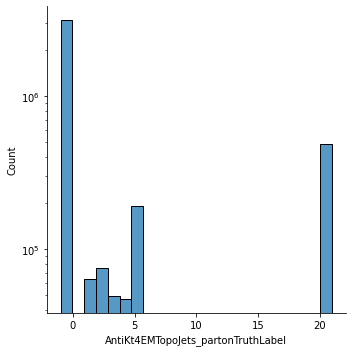

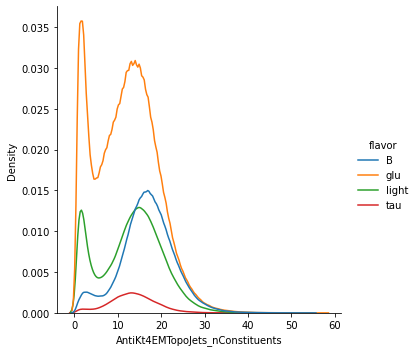

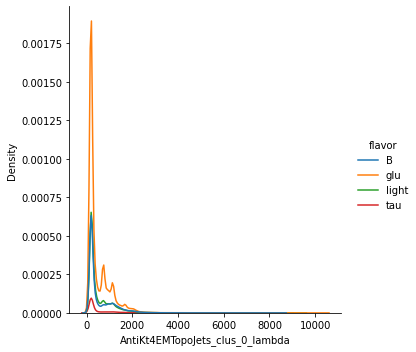

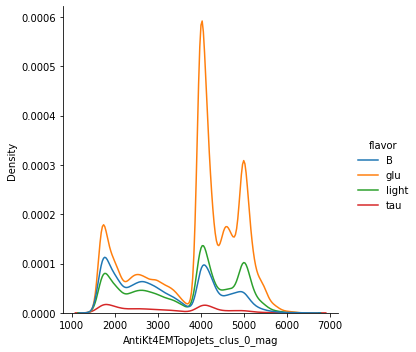

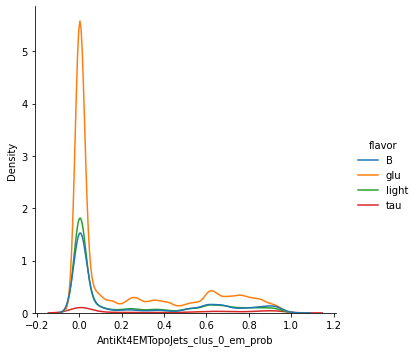

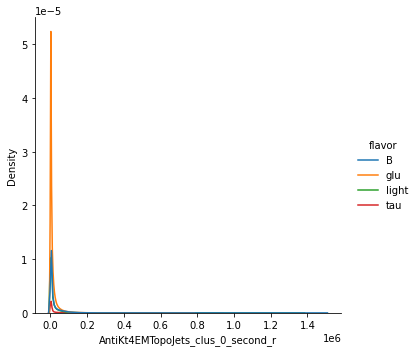

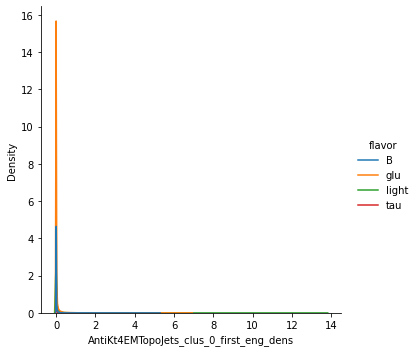

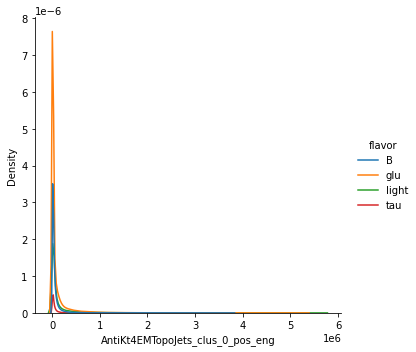

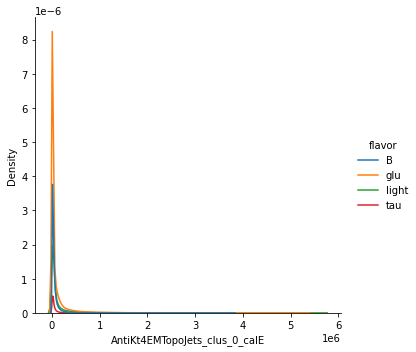

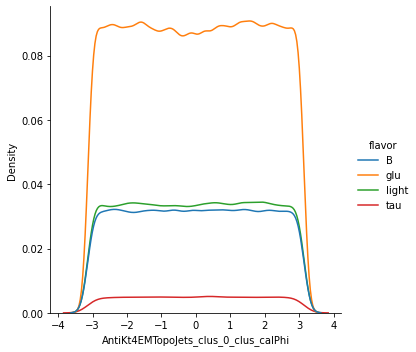

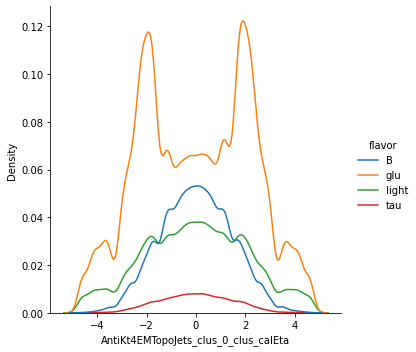

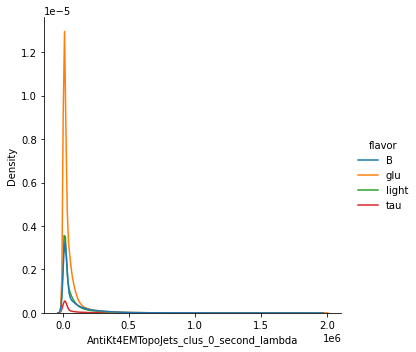

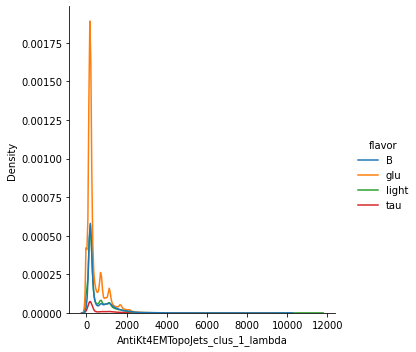

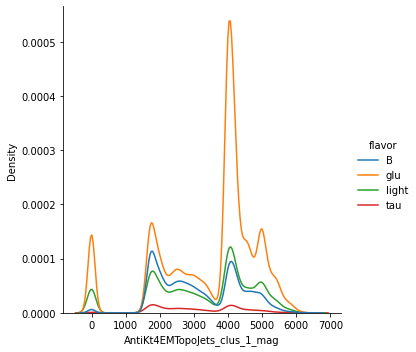

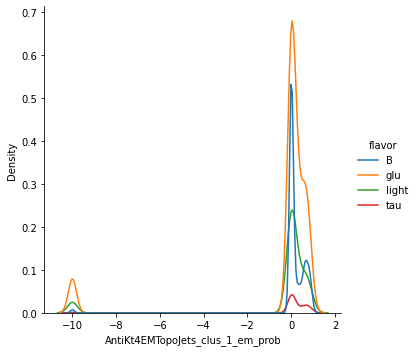

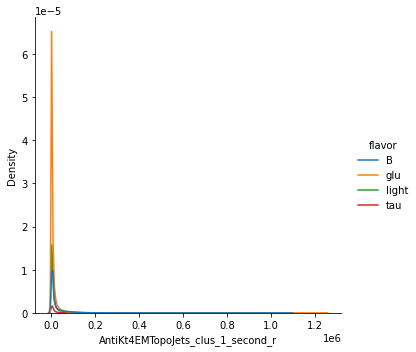

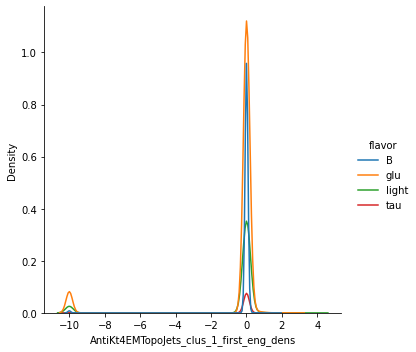

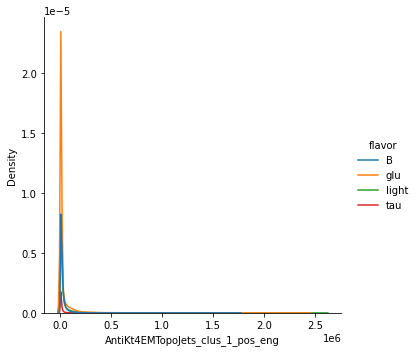

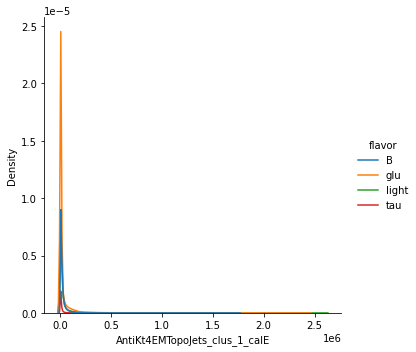

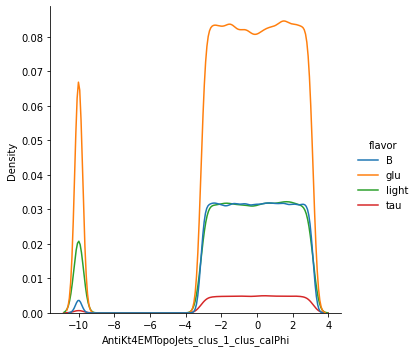

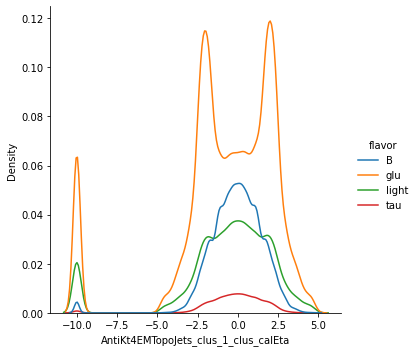

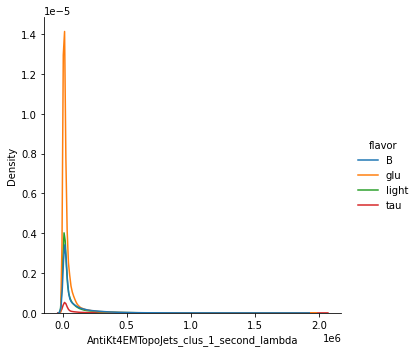

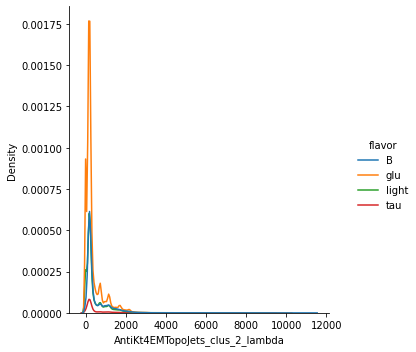

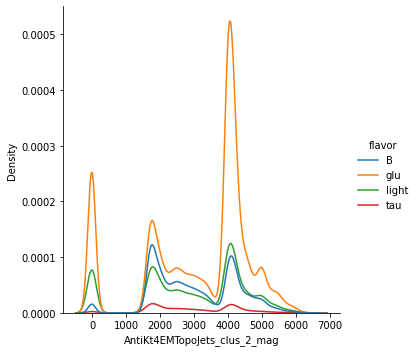

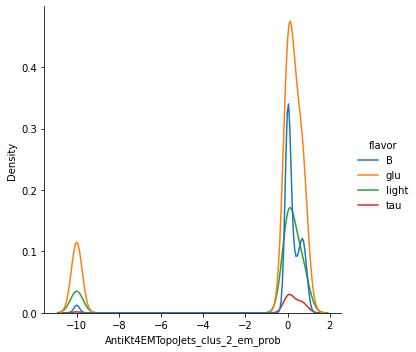

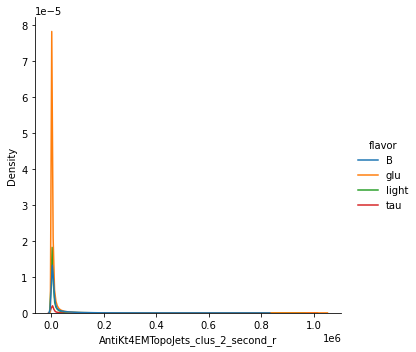

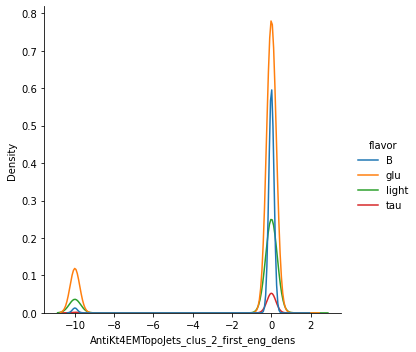

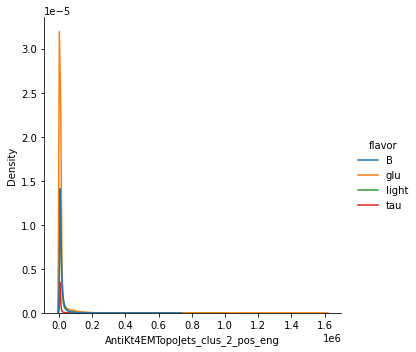

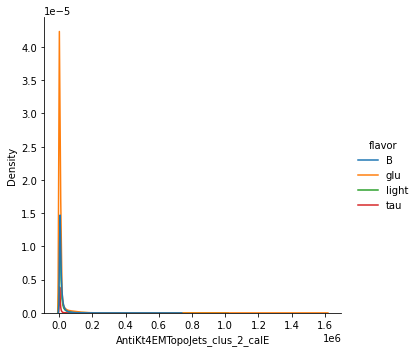

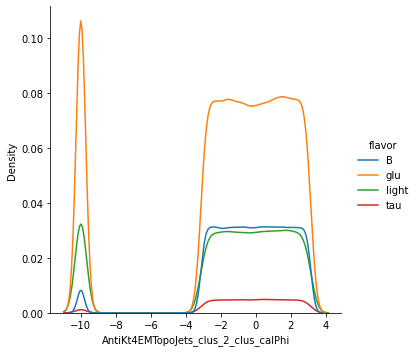

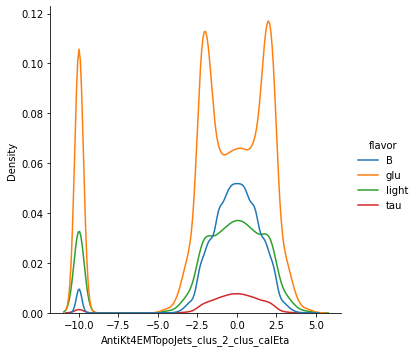

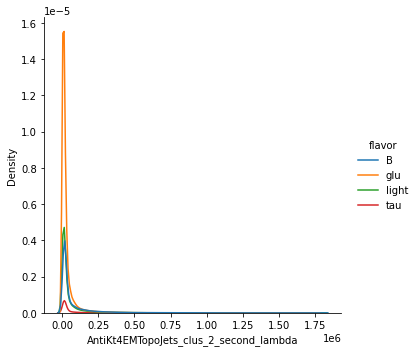

In [8]:
import seaborn as sns
df.loc[y_df==0,'flavor'] = "light"
df.loc[y_df==1,"flavor"]="B"
df.loc[y_df==2,"flavor"]="glu"
df.loc[y_df==3,"flavor"]="tau"




df["flavor"] = df['flavor'].astype('category')
sns.displot(data=df_events,x='AntiKt4EMTopoJets_partonTruthLabel',log=True)
plt.savefig('partonTruthLabel.png')

#g = sns.pairplot(df, vars=variables_for_train,hue='flavor', palette="Set2", height=3)
for var in variables_for_train:
    sns.displot(data=df, x=var, hue="flavor", kind="kde")
    plt.savefig(var+".png")
#    #sns.lineplot(x=var, y="AU",hue="flavor", style="event",data=df)

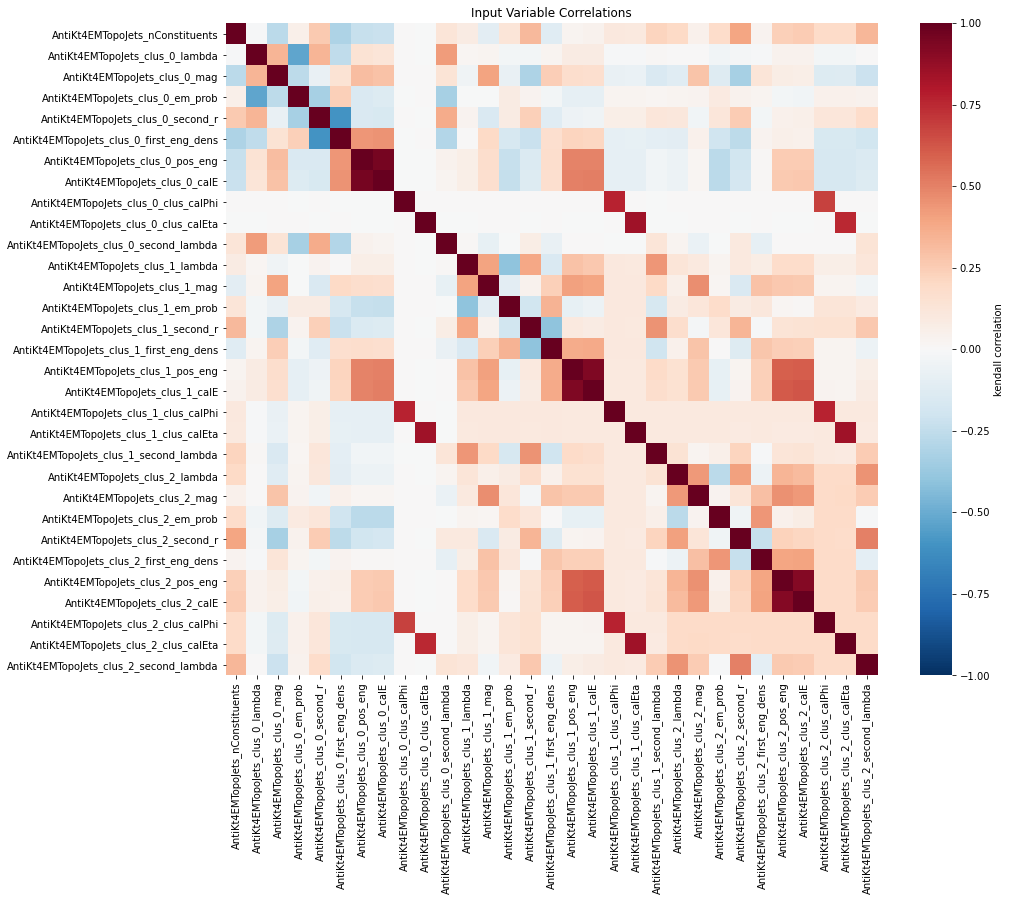

In [9]:
# Different correlation coefficients compared 
#here: https://datascience.stackexchange.com/questions/64260/pearson-vs-spearman-vs-kendall
method ='kendall'
correlations = df[variables_for_train].astype(np.float64).corr(method = method) 
plt.figure(figsize = (15,12))
sns.heatmap(correlations, vmin = -1, annot = False, square = True, 
            cbar_kws = {'label' : method+' correlation'}, cmap="RdBu_r")
plt.title('Input Variable Correlations')
plt.savefig("correlation.png")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Reduce to the variables we weant to train on 

X_train,X_test,y_train,y_test = train_test_split(df[variables_for_train],y_df,test_size=0.8)
#test  = xgb.DMatrix(data=test[variables_for_train],feature_names=variables_for_train)

In [11]:
def CreateBalancedSampleWeights(y_train, largest_class_weight_coef):
    classes = np.unique(y_train, axis = 0)
    classes.sort()
    class_samples = np.bincount(y_train)
    total_samples = class_samples.sum()
    n_classes = len(class_samples)
    weights = total_samples / (n_classes * class_samples * 1.0)
    class_weight_dict = {key : value for (key, value) in zip(classes, weights)}
    class_weight_dict[classes[1]] = class_weight_dict[classes[1]] * largest_class_weight_coef
    sample_weights = [class_weight_dict[y] for y in y_train]
    return sample_weights

In [12]:
largest_class_weight_coef =  max(df['flavor'].value_counts().values)/df.shape[0]

#pass y_train as numpy array
weight = CreateBalancedSampleWeights(y_train, largest_class_weight_coef)

#And then use it like this
#xg = XGBClassifier(n_estimators=1000, weights = weight, max_depth=20)

In [13]:
#param_dist = {'eta':0.1,'max_depth':10,'eval_metric':'error','objective':'binary:logistic', 'n_estimators':300}
#clf = xgb.XGBModel(**param_dist)
#clf.fit(X_train, y_train)
#y_pred = XGBclassifier.predict(X_test)

In [14]:
#fig = plt.figure()
#xgb.plot_importance(clf)#, ax=plt.gca())
#fig.subplots_adjust(left=0.4)

In [15]:
#Plot predictions
#y_pred = clf.predict(X_test,output_margin=True)
#y_pred = clf.predict(df_bJets[variables_for_train])
#y_pred = clf.predict(df_lightjets[variables_for_train])

#plt.figure()
#plt.hist(y_pred,bins=np.linspace(0,1,20),histtype='step',color='darkgreen',label='All events')
#plt.xlabel("Prediction from BDT", fontsize=12)
#plt.ylabel("Events",fontsize=12)
#print(len(y_test),len(y_pred))

In [16]:
#from sklearn.metrics import roc_curve,auc
#fpr, tpr,_ = roc_curve(y_test,y_pred)
#roc_auc = auc(fpr,tpr)
#plt.figure()
#plt.plot(fpr, tpr,'b',label='AUC:%.2f'%roc_auc)
#plt.legend(loc = 'lower right')
#plt.xlabel("false-positives")
#plt.ylabel("true-positives")
#plt.show()


In [17]:
def compare_train_test(clf, X_train, y_train, X_test, y_test, bins=30):
    decisions = []
    for X,y in ((X_train, y_train), (X_test, y_test)):
        d1 = clf.predict(X[y>0.5]).ravel()
        d2 = clf.predict(X[y<0.5]).ravel()
        decisions += [d1, d2]
        
    low = min(np.min(d) for d in decisions)
    high = max(np.max(d) for d in decisions)
    low_high = (low,high)
    
    plt.hist(decisions[0],
             color='r', alpha=0.5, range=low_high, bins=bins,
             histtype='stepfilled', density=True,
             label='S (train)')
    plt.hist(decisions[1],
             color='b', alpha=0.5, range=low_high, bins=bins,
             histtype='stepfilled', density=True,
             label='B (train)')

    hist, bins = np.histogram(decisions[2],
                              bins=bins, range=low_high, density=True)
    scale = len(decisions[2]) / sum(hist)
    err = np.sqrt(hist * scale) / scale
    
    width = (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.errorbar(center, hist, yerr=err, fmt='o', c='r', label='S (test)')
    
    hist, bins = np.histogram(decisions[3],
                              bins=bins, range=low_high, density=True)
    scale = len(decisions[2]) / sum(hist)
    err = np.sqrt(hist * scale) / scale

    plt.errorbar(center, hist, yerr=err, fmt='o', c='b', label='B (test)')

    plt.xlabel("BDT output")
    plt.ylabel("Arbitrary units")
    plt.legend(loc='best')
    
#compare_train_test(clf, X_train, y_train, X_test, y_test)

In [18]:
#Hyper parameter optimization
#https://www.kaggle.com/prashant111/a-guide-on-xgboost-hyperparameters-tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import accuracy_score

space={'max_depth': hp.choice('max_depth', np.arange(3, 20, dtype=int)),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': hp.choice('n_estimators',np.arange(10,500,dtype=int)),
        'objective':hp.choice('objective',['multi:softmax','multi:softprob']),
        'seed': 0
    }

def objective(space):
    clf=xgb.XGBClassifier(num_class=4,
                          objective=space['objective'],n_estimators =space['n_estimators'],
                          max_depth = int(space['max_depth']), 
                          gamma = space['gamma'],reg_alpha = int(space['reg_alpha']),
                          min_child_weight=int(space['min_child_weight']),
                          colsample_bytree=int(space['colsample_bytree']),tree_method='gpu_hist')
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="mlogloss",
            early_stopping_rounds=10,verbose=False,sample_weight=weight)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [19]:
trials = Trials()

best_hyperparams = fmin(fn = objective,space = space,algo = tpe.suggest, max_evals=100,trials = trials)

best_hyperparams

SCORE:                                                 
0.2084596112804334                                     
SCORE:                                                                            
0.2094017887095738                                                                
SCORE:                                                                            
0.20886217800015702                                                               
SCORE:                                                                            
0.20617268970242897                                                               
SCORE:                                                                            
0.20574442723463787                                                               
SCORE:                                                                            
0.2103025674334944                                                                
SCORE:                                                    

0.20921335322374573                                                                 
SCORE:                                                                              
0.20972298556041713                                                                 
SCORE:                                                                              
0.20855525656490675                                                                 
SCORE:                                                                              
0.2098671672579068                                                                  
SCORE:                                                                              
0.20662664791828753                                                                 
SCORE:                                                                              
0.2093618175459133                                                                  
SCORE:                                                           

0.20864804676626147                                                                 
SCORE:                                                                              
0.20961877502658796                                                                 
SCORE:                                                                              
0.20875368484164994                                                                 
SCORE:                                                                              
0.21051669866738995                                                                 
100%|██████████| 100/100 [07:52<00:00,  4.72s/trial, best loss: -0.21067087315579475]


{'colsample_bytree': 0.504042821301819,
 'gamma': 2.636668689575344,
 'max_depth': 9,
 'min_child_weight': 9.0,
 'n_estimators': 79,
 'objective': 1,
 'reg_alpha': 131.0,
 'reg_lambda': 0.5816695768436368}

In [20]:
#best_hyperparams={'colsample_bytree': 0.8714320093344716,'gamma': 7.151591649894591,
#                  'max_depth': 17,'min_child_weight': 9.0,'n_estimators': 196,
#                  'objective': 'binary:logistic','reg_alpha': 77.0,'reg_lambda': 0.6943024780527273}
best_hyperparams['objective']='multi:softprob'
best_hyperparams['num_class']=4
clf = xgb.XGBModel(**best_hyperparams)
clf.fit(X_train,y_train)


XGBModel(base_score=0.5, booster='gbtree', colsample_bylevel=1,
         colsample_bynode=1, colsample_bytree=0.504042821301819,
         gamma=2.636668689575344, gpu_id=-1, interaction_constraints='',
         learning_rate=0.300000012, max_delta_step=0, max_depth=9,
         min_child_weight=9.0, monotone_constraints='()', n_estimators=79,
         n_jobs=0, num_class=4, num_parallel_tree=1, objective='multi:softprob',
         random_state=0, reg_alpha=131.0, reg_lambda=0.5816695768436368,
         subsample=1, tree_method='exact', validate_parameters=1)

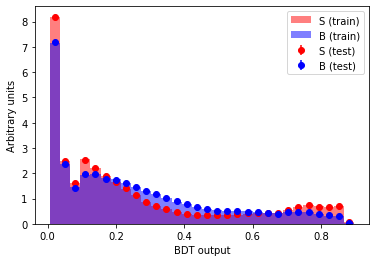

In [21]:
#y_pred = clf.predict(X_test)
compare_train_test(clf, X_train, y_train, X_test, y_test)
#fig = plt.figure()
#xgb.plot_importance(clf)#, ax=plt.gca())
#fig.subplots_adjust(left=0.4)
plt.savefig("bdt_output.png")

In [23]:
from sklearn.metrics import roc_curve,auc
y_pred = clf.predict(X_test,output_margin=True)

